# Looping Graph
The purpose of this exercise is to build a graph with a loop. Or, in other words, a cyclical graph.   
Challenge: Create a state machine that will generate n random numbers via looping. 1 random number per loop. It also needs to greet the user.

In [7]:
from typing import Dict, List, TypedDict
from langgraph.graph import StateGraph, END
import random

In [8]:
# Define our state
class AgentState(TypedDict):
    name: str
    numbers: List[int]
    limit: int

In [9]:
# Greeting node
def greeter(state: AgentState) -> AgentState:
    """
    This node greets the user and initalises the numbers list
    """
    state['name'] = f"Hey {state['name']}! Welcome!"
    state['numbers'] = []
    return state

# Random number generator
def random_num_generator(state: AgentState) -> AgentState:
    """
    This node inserts a new random number to random numbers list
    """
    state['numbers'].append(random.randint(0, 10))
    return state

In [10]:
# Function to implement looping edge logic
def should_continue(state: AgentState) -> str:
    """
    This function implements the logic for looping edge
    """
    if len(state['numbers']) >= state['limit']:
        return "exit"
    else:
        return "loop"

In [11]:
graph = StateGraph(AgentState)
graph.add_node(greeter.__name__, greeter)
graph.add_node(random_num_generator.__name__, random_num_generator)

graph.set_entry_point(greeter.__name__)
graph.add_edge(greeter.__name__, random_num_generator.__name__)
graph.add_conditional_edges(
    random_num_generator.__name__,
    should_continue,
    {
        "loop": random_num_generator.__name__,
        "exit": END
    }
)
app = graph.compile()

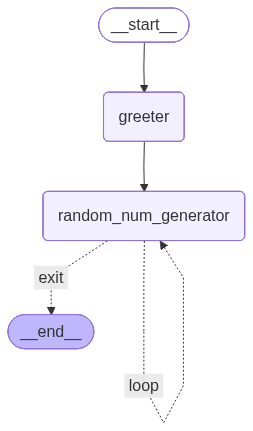

In [12]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
initial_state: AgentState = {
    'name': "Ata",
    'limit': 5
}
final_state: AgentState = app.invoke(initial_state)
print(final_state['name'])
print(f"Here are the {final_state['limit']} numbers generated by this state machine: {final_state['numbers']}")

Hey Ata! Welcome!
Here are the 5 numbers generated by this state machine: [10, 0, 8, 0, 6]
